In [268]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import random
from sklearn.model_selection import train_test_split

In [269]:
boston = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [270]:
X = pd.DataFrame(boston.data)
X['intercept'] = 1
X = np.array(X)
Y = boston.target

In [271]:
def stepGradient(x, y, m, learningRate, tuning):
  m_gradient = [0]*14
  for i in range(13):
    m_gradient[i] = -2*x[i]*(y - np.dot(m,x)) + 2*tuning*m[i]
  m_gradient[13] = -2*(y - np.dot(m,x))
  # Update coefficients
  new_m = [0]*14
  for i in range(14):
    new_m[i] = m[i] - learningRate*m_gradient[i]
  
  return new_m

In [272]:
def sgd(X, Y):
  m = [1]*14
  tuning = 0.01
  learningRate = 0.001
  error = []
  for k in range(10000):
    cost = sum((Y - np.dot(X,m))**2)/len(Y) + tuning*(sum([i**2 for i in m]))
    i = random.randrange(len(Y))
    m = stepGradient(X[i], Y[i], m, learningRate, tuning)
    y_pred = np.dot(X,m)
    error.append(mean_squared_error(y_pred,Y))
  return m, error

In [273]:
# Training using SGD
# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# normalize data
for i in range(len(X_train[0])):
  if(i!=13):
    min, max = X_train[:,i].min(), X_train[:,i].max()
    X_train[:,i] = (X_train[:,i] - min)/(max - min)
    X_test[:,i] = (X_test[:,i] - min)/(max - min)

# get optimal coefficients
m, error = sgd(X_train, y_train)
print("New coefficients:",m)
# # run on testing data
y_pred = np.dot(X_test, m)
print("Test MSE:",mean_squared_error(y_test, y_pred))

New coefficients: [-1.0180366165932357, 5.248742595405718, -1.8163388622082952, 3.694080650262018, 0.09850148762456754, 14.108903322284053, 1.3163053314302682, 1.7397558645070286, -0.2701291500543387, -2.4345875902406235, -4.762316855560389, 8.670689140958006, -7.497248092558994, 11.997660104926997]
Test MSE: 40.358035111661


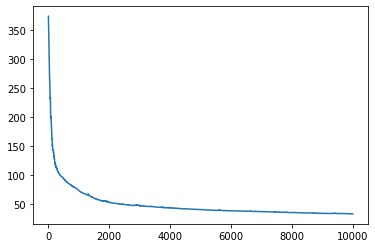

In [274]:
import matplotlib.pyplot as plt
plt.plot(error)